In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as datetime

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [20]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [21]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date)



('2017-08-23',)


Date one year from the last date: 2016-08-23
Date: 2016-08-24, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-28, Precipitation: 0.01
Date: 2016-08-29, Precipitation: 0.0
Date: 2016-08-30, Precipitation: 0.0
Date: 2016-08-31, Precipitation: 0.13
Date: 2016-09-01, Precipitation: 0.0
Date: 2016-09-02, Precipitation: 0.0
Date: 2016-09-03, Precipitation: 0.0
Date: 2016-09-04, Precipitation: 0.03
Date: 2016-09-05, Precipitation: None
Date: 2016-09-06, Precipitation: None
Date: 2016-09-07, Precipitation: 0.05
Date: 2016-09-08, Precipitation: 0.0
Date: 2016-09-09, Precipitation: 0.03
Date: 2016-09-10, Precipitation: 0.0
Date: 2016-09-11, Precipitation: 0.05
Date: 2016-09-12, Precipitation: 0.0
Date: 2016-09-13, Precipitation: 0.02
Date: 2016-09-14, Precipitation: 1.32
Date: 2016-09-15, Precipitation: 0.42
Date: 2016-09-16, Precipitation: 0.06
Date: 2016-09-17, Precipitation: 0.05
Date: 2016-09-1

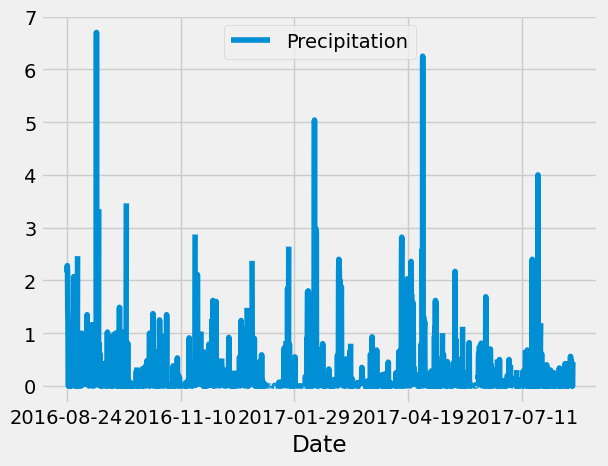

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the data set
last_year_date = session.query(func.date(most_recent_date.date, '-1 year')).scalar()
print("Date one year from the last date:", last_year_date)

# Perform a query to retrieve the data and precipitation scores
start_date = datetime.strptime('2016-08-23', '%Y-%m-%d')
end_date = datetime.strptime('2017-08-23', '%Y-%m-%d')

scores = session.query(Measurement.date, Measurement.prcp)\
                .filter(Measurement.date >= start_date, Measurement.date <= end_date)\
                .all()

# Iterate over the results and print the precipitation and date
for date, prcp in scores:
    print(f"Date: {date}, Precipitation: {prcp}")

# Sort the dataframe by date

scores_df = pd.DataFrame(scores, columns=["Date", "Precipitation"])
scores2_df = scores_df.sort_values("Date")
scores2_df.head()

# Use Pandas Plotting with Matplotlib to plot the data


scores2_df.plot(kind='line', x="Date", y="Precipitation")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()

NameError: name 'session' is not defined